In [1]:
"""upload data"""
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data_url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(data_url)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
"""Data types and missing values"""
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)

print("\nBasic Statistics:")
print(df.describe())
print("\n" + "="*50)

print("\nClass Distribution:")
print(df['Outcome'].value_counts())
print(f"\nDiabetes Rate: {df['Outcome'].mean()*100:.2f}%")

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  19

In [3]:
"""Check how many zeros (missing values) we have"""
print("Zero values in each column (representing missing data):")
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.1f}%)")

Zero values in each column (representing missing data):
Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
Insulin: 374 zeros (48.7%)
BMI: 11 zeros (1.4%)


In [4]:
from sklearn.impute import SimpleImputer

# Replace zeros with NaN
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Check missing values
print("Missing values after replacing zeros:")
print(df[zero_cols].isnull().sum())
print("\n" + "="*50)

# Impute with median
imputer = SimpleImputer(strategy='median')
df[zero_cols] = imputer.fit_transform(df[zero_cols])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df[zero_cols].isnull().sum())
print("\n✓ All missing values have been imputed!")

Missing values after replacing zeros:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Missing values after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

✓ All missing values have been imputed!


In [5]:
"""features/labels"""
# Separate features (X) and target (y)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df[feature_cols]
y = df['Outcome']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeature columns:", list(X.columns))
print("\nTarget distribution:")
print(y.value_counts())

Features (X) shape: (768, 8)
Target (y) shape: (768,)

Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


In [6]:
"""Standardization """
from sklearn.preprocessing import StandardScaler

# Before scaling - let's see the range
print("BEFORE SCALING:")
print(X.describe().loc[['mean', 'std', 'min', 'max']])
print("\n" + "="*70 + "\n")

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to see column names
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

print("AFTER SCALING:")
print(X_scaled.describe().loc[['mean', 'std', 'min', 'max']])
print("\n✓ All features now have mean≈0 and std≈1")

BEFORE SCALING:
      Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean     3.845052  121.656250      72.386719      29.108073  140.671875   
std      3.369578   30.438286      12.096642       8.791221   86.383060   
min      0.000000   44.000000      24.000000       7.000000   14.000000   
max     17.000000  199.000000     122.000000      99.000000  846.000000   

            BMI  DiabetesPedigreeFunction        Age  
mean  32.455208                  0.471876  33.240885  
std    6.875177                  0.331329  11.760232  
min   18.200000                  0.078000  21.000000  
max   67.100000                  2.420000  81.000000  


AFTER SCALING:
       Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
mean -6.476301e-17  4.625929e-18   5.782412e-18  -1.526557e-16  1.503427e-17   
std   1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min  -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.516429e+00 -1.467353e+00

In [7]:
"""train-test split"""
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test, stratified
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Training set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  Diabetes rate: {y_train.mean()*100:.2f}%")

print("\nTest set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print(f"  Diabetes rate: {y_test.mean()*100:.2f}%")

print("\n✓ Data split completed!")

Training set:
  X_train shape: (614, 8)
  y_train shape: (614,)
  Diabetes rate: 34.85%

Test set:
  X_test shape: (154, 8)
  y_test shape: (154,)
  Diabetes rate: 35.06%

✓ Data split completed!


In [8]:
"""2 parameter both model train"""
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Store models and their names
models = {}

print("Training models...\n")

# 1. Logistic Regression - 2 versions
print("1. Logistic Regression")
lr1 = LogisticRegression(C=0.1, random_state=42, max_iter=1000)
lr1.fit(X_train, y_train)
models['LR (C=0.1)'] = lr1
print("   ✓ LR with C=0.1 trained")

lr2 = LogisticRegression(C=1.0, random_state=42, max_iter=1000)
lr2.fit(X_train, y_train)
models['LR (C=1.0)'] = lr2
print("   ✓ LR with C=1.0 trained")

# 2. K-Nearest Neighbors - 2 versions
print("\n2. K-Nearest Neighbors")
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)
models['KNN (k=5)'] = knn1
print("   ✓ KNN with k=5 trained")

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)
models['KNN (k=10)'] = knn2
print("   ✓ KNN with k=10 trained")

# 3. Random Forest - 2 versions
print("\n3. Random Forest")
rf1 = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=100)
rf1.fit(X_train, y_train)
models['RF (depth=5)'] = rf1
print("   ✓ RF with max_depth=5 trained")

rf2 = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100)
rf2.fit(X_train, y_train)
models['RF (depth=10)'] = rf2
print("   ✓ RF with max_depth=10 trained")

print(f"\n✓ All {len(models)} models trained successfully!")

Training models...

1. Logistic Regression
   ✓ LR with C=0.1 trained
   ✓ LR with C=1.0 trained

2. K-Nearest Neighbors
   ✓ KNN with k=5 trained
   ✓ KNN with k=10 trained

3. Random Forest
   ✓ RF with max_depth=5 trained
   ✓ RF with max_depth=10 trained

✓ All 6 models trained successfully!


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate all models on test set
results = []

print("Evaluating models on test set...\n")
print("="*80)

for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    
    print(f"{model_name:15} | Acc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}")

print("="*80)

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\n")
print(results_df.to_string(index=False))
print("\n✓ Evaluation completed!")

Evaluating models on test set...

LR (C=0.1)      | Acc: 0.688 | Prec: 0.565 | Rec: 0.481 | F1: 0.520
LR (C=1.0)      | Acc: 0.701 | Prec: 0.587 | Rec: 0.500 | F1: 0.540
KNN (k=5)       | Acc: 0.753 | Prec: 0.660 | Rec: 0.611 | F1: 0.635
KNN (k=10)      | Acc: 0.740 | Prec: 0.652 | Rec: 0.556 | F1: 0.600
RF (depth=5)    | Acc: 0.740 | Prec: 0.667 | Rec: 0.519 | F1: 0.583
RF (depth=10)   | Acc: 0.760 | Prec: 0.681 | Rec: 0.593 | F1: 0.634


        Model  Accuracy  Precision   Recall  F1-Score
   LR (C=0.1)  0.688312   0.565217 0.481481  0.520000
   LR (C=1.0)  0.701299   0.586957 0.500000  0.540000
    KNN (k=5)  0.753247   0.660000 0.611111  0.634615
   KNN (k=10)  0.740260   0.652174 0.555556  0.600000
 RF (depth=5)  0.740260   0.666667 0.518519  0.583333
RF (depth=10)  0.759740   0.680851 0.592593  0.633663

✓ Evaluation completed!


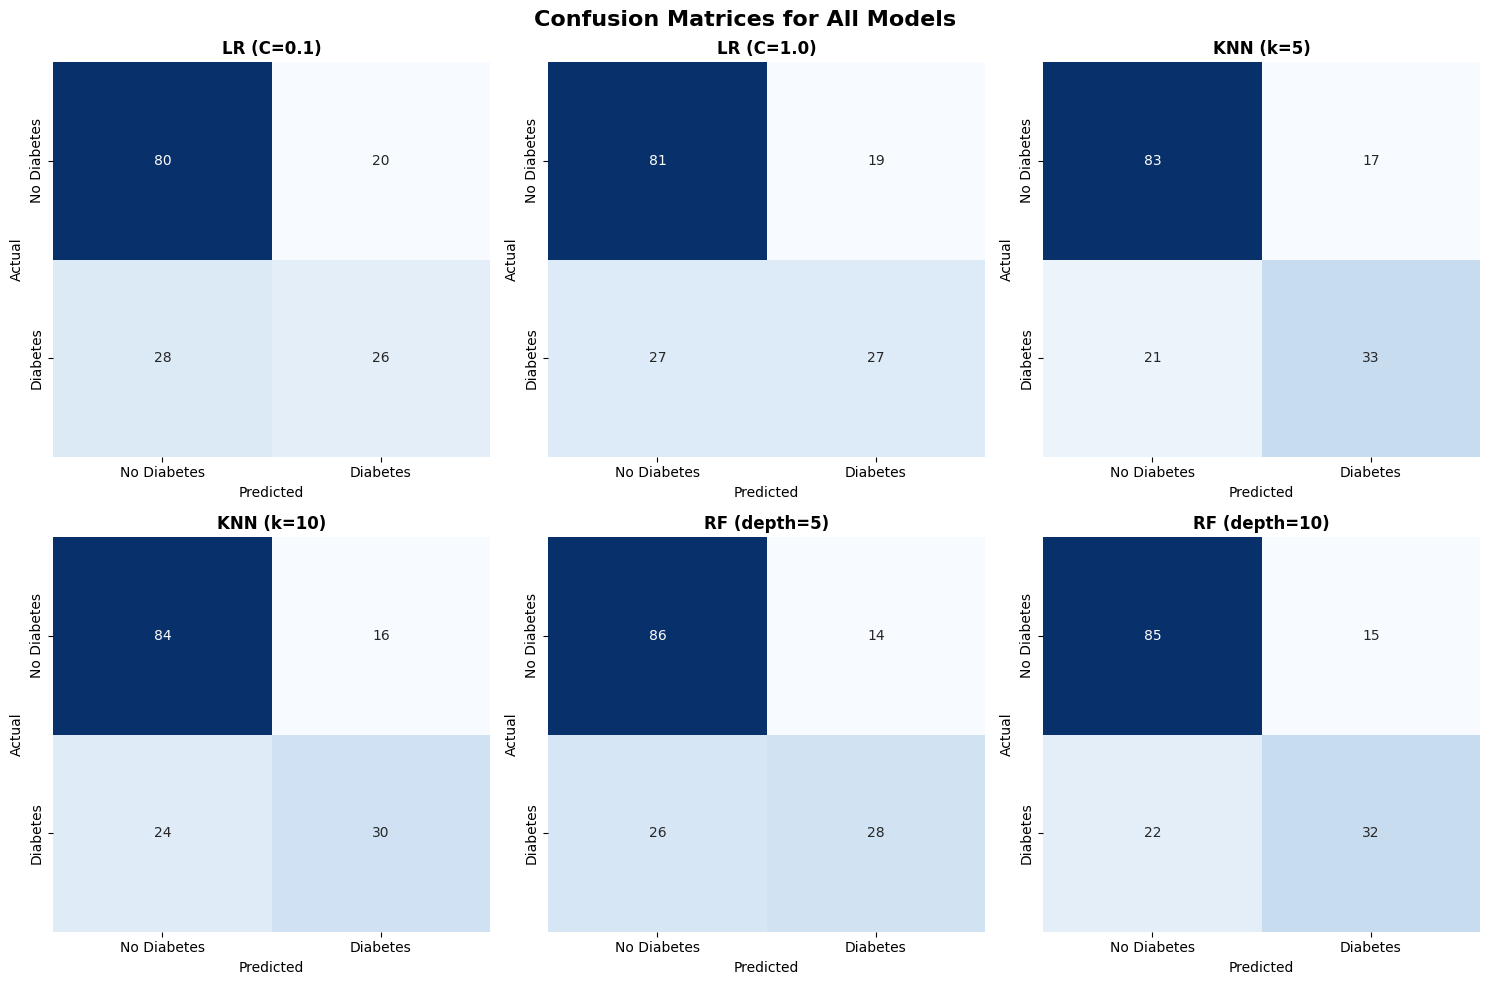


📊 Confusion Matrix Açıklaması:
  • Sol üst (TN): Sağlıklı → Sağlıklı dedi ✓
  • Sağ üst (FP): Sağlıklı → Hasta dedi ✗ (Yanlış alarm)
  • Sol alt (FN): Hasta → Sağlıklı dedi ✗ (Tehlikeli!)
  • Sağ alt (TP): Hasta → Hasta dedi ✓


In [10]:
"""visualization"""
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')

axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'],
                ax=axes[idx], cbar=False)
    
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

print("\n📊 Confusion Matrix Açıklaması:")
print("  • Sol üst (TN): Sağlıklı → Sağlıklı dedi ✓")
print("  • Sağ üst (FP): Sağlıklı → Hasta dedi ✗ (Yanlış alarm)")
print("  • Sol alt (FN): Hasta → Sağlıklı dedi ✗ (Tehlikeli!)")
print("  • Sağ alt (TP): Hasta → Hasta dedi ✓")

## Model Performance Analysis and Recommendations

### Model Comparison

Six classification models were trained and evaluated on the Pima Indians Diabetes dataset. The best overall performance was obtained with Random Forest max_depth=10 (76.0% accuracy) and then with KNN with k=5 (75.3% accuracy). Lower performance was observed in Logistic Regression models with an accuracy of about 69-70% indicating that the feature relationship with diabetes is not linear.

The use of parameter tuning showed clear effects with better performance of Logistic Regression with increased regularization (C=1.0 vs C=0.1) and KNN with reduced number of neighbors (k=5 vs k=10), which suggests the significance of local patterns. Random Forest had the advantage of having more depth (depth=10 vs depth=5), which were more capable of representing more complex decision boundaries.

### Critical Metric for Medical Classification

Recall is the most important metric in the case of diabetes prediction. False negative (inability to detect a diabetic patient) is catastrophic as untreated diabetes causes serious complications such as cardiovascular disease, kidney failure, and loss of sight. Conversely, false positive leads to further testing which is much less detrimental.

Our best model (RF depth=10) achieved 59.3% recall, meaning 40% of diabetic patients were missed. KNN (k=5) was more successful with recall (61.1%), so it is a convincing substitute although the accuracy is not as high. This is a trade-off between general accuracy and recall and is important in medical applications.

### Recommended Model

I would suggest Random Forest max_depth=10 to be deployed, and the recall metrics should be closely monitored. Although KNN (k=5) is slightly better on recall, Random Forest is easier to interpret (using feature importance analysis) and more predictable.

### Improvement Suggestions

1. **Address Class Imbalance**: The dataset consists of 35% diabetic cases only. The use of SMOTE (Synthetic Minority Over-sampling) or class weight adjusting might enhance recall because it will help the model to learn diabetic patterns more effectively.

2. **Feature Engineering**: Build interaction features (e.g. BMI × Age, Glucose × Insulin) and polynomial features. Medical conditions generally constitute complicated interplay between variables that existing features fail to capture.

